In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})
pd.set_option('display.max_columns', None)

In [2]:
dataset=pd.read_csv('Datasets/encoded_csv')

In [3]:
dataset.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,income,capital_income,native_countryUnited-States,native_countryMexico,native_countryPhilippines,native_countryGermany,native_countryPuerto-Rico,native_countryCanada,native_countryEl-Salvador,native_countryIndia,native_countryCuba,native_countryEngland
0,39.0,2,77516.0,13.0,0,1,0,0,0,40.0,0,2174.0,1,0,0,0,0,0,0,0,0,0
1,50.0,6,83311.0,13.0,1,2,1,0,0,32.5,0,0.0,1,0,0,0,0,0,0,0,0,0
2,38.0,7,215646.0,9.0,2,3,0,0,0,40.0,0,0.0,1,0,0,0,0,0,0,0,0,0
3,53.0,7,234721.0,7.0,1,3,1,1,0,40.0,0,0.0,1,0,0,0,0,0,0,0,0,0
4,28.0,7,338409.0,13.0,1,4,2,1,1,40.0,0,0.0,0,0,0,0,0,0,0,0,1,0


In [6]:
num_features=['age','fnlwgt','hours_per_week','capital_income']

In [11]:
def density_plots(df,num_features):
    plt.suptitle("Distribution of numerical features")
    i=1
    for feature in num_features:
        plt.subplot(2,2,i)
        i+=1
        sns.kdeplot(df[feature],color='orange',shade=True)
        plt.tight_layout()

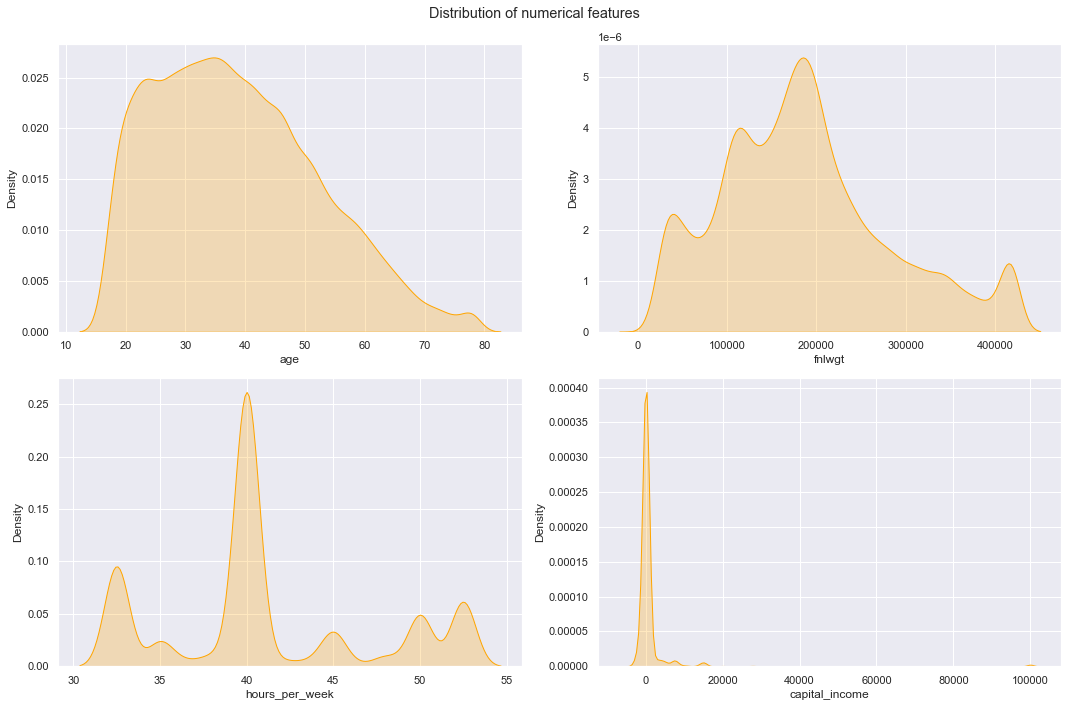

In [12]:
density_plots(dataset,num_features)

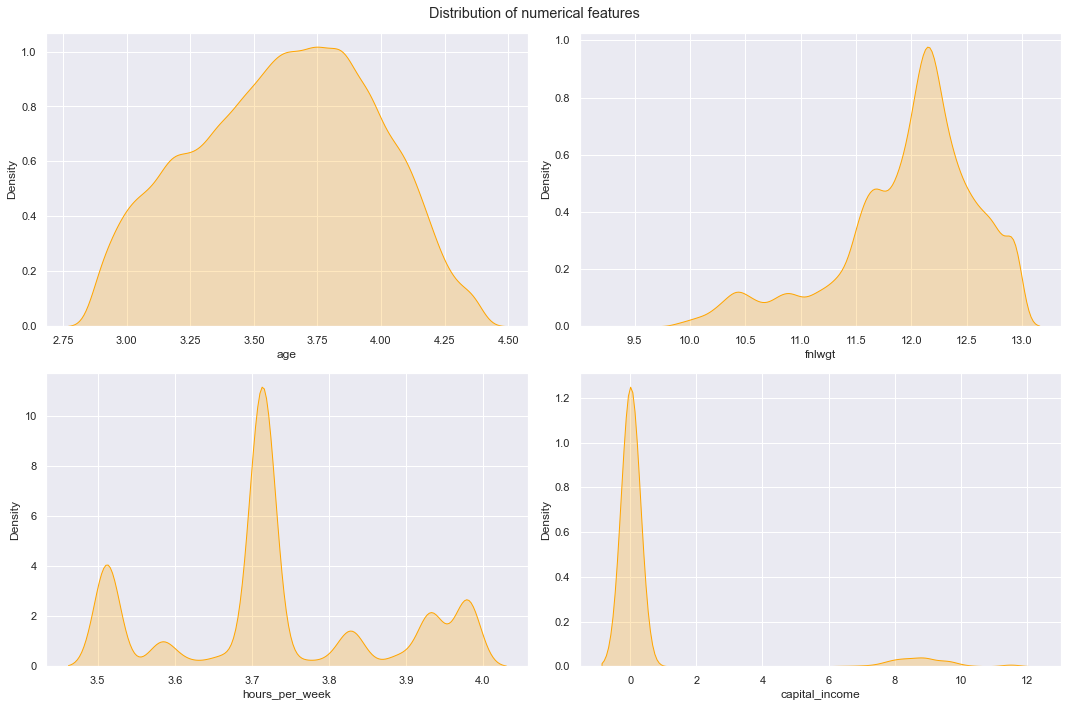

In [13]:
## log transformation

df1=dataset.copy()
for feature in num_features:
    df1[feature]=df1[feature].apply(np.log1p)
density_plots(df1,num_features)

### Applying yeo johnson transfomer

In [23]:
from sklearn.preprocessing import PowerTransformer
def power_plots(df1,col,t):
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.kdeplot(df1[col])
    plt.title('Before tranfomation')
    plt.subplot(122)
    df1[col]=t.fit_transform(df1[[col]]+0.0000001).flatten()
    sns.kdeplot(df1[col])
    plt.title('After transformation')
    plt.show()

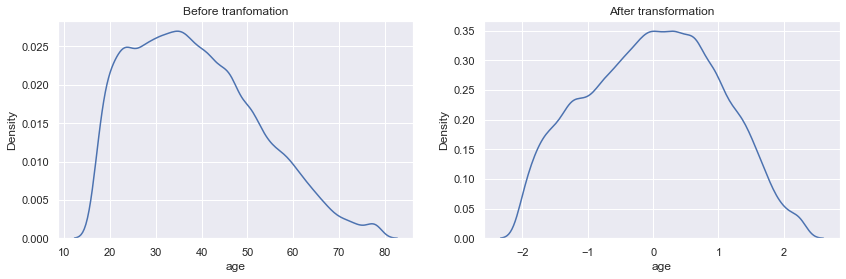

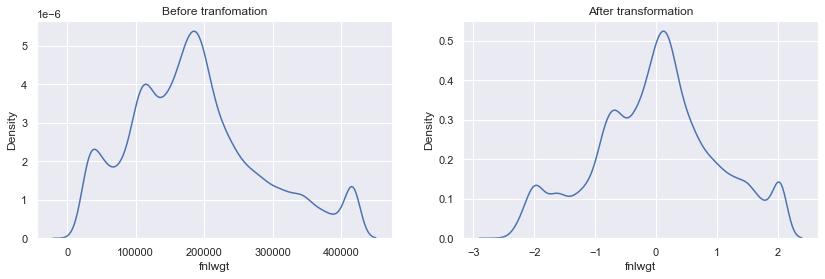

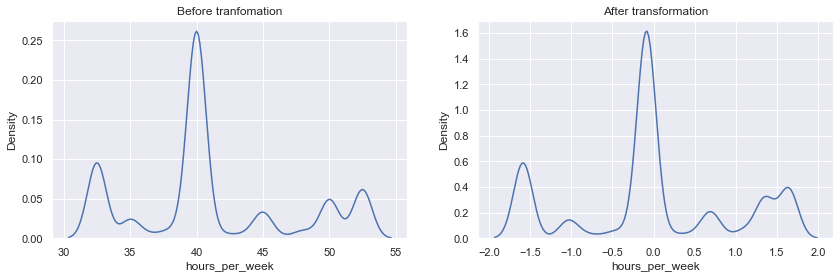

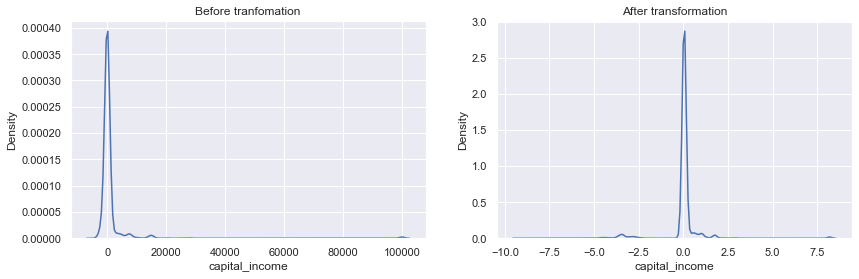

In [24]:
df1=dataset.copy()
for feature in num_features:
    power_plots(df1,feature,PowerTransformer())

In [25]:
dataset[num_features].skew()

age                0.515425
fnlwgt             0.555153
hours_per_week     0.439390
capital_income    11.811381
dtype: float64

In [26]:
df1[num_features].skew()

age              -0.016395
fnlwgt           -0.047066
hours_per_week    0.020297
capital_income    0.801786
dtype: float64

- yeo-jhonson transformation is removed the skewness

In [27]:
df1.to_csv('Datasets/scaled_csv',index=False)